<div style="background-color: RGB(230,115,0);">
    <h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center; font-weight: bold; text-decoration: underline; font-style: ;">PROJET 9 - DATA ANALYST</h1>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center; font-weight: bold; text-decoration: underline; font-style: ;">Produisez une étude de marché avec R ou Python</h2>
    <h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center; font-weight: bold; text-decoration: ; font-style: italic;">Partie 2 - Clustering et visualisations </h2>
</div> 

<h2><span style="font-weight: bold; text-decoration: underline;">Objectifs :</span></h2>
<h2>1 - Classification ascendante hiérarchique (CAH)</h2>
<ul style="color: green;">
  <li>Dendrogramme</li>
  <li>Interpretation du résultat</li>
</ul>
<h2>2 - k-means  </h2>
<ul style="color: green;">
  <li>Evaluation du "k"</li>
  <li>Etude des centroides et représentation en 2 dimension (t-SNE)</li>
</ul>


In [1]:
# Importations des librairies 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.collections import LineCollection
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

In [2]:
# Importations du dataframe :

df_final = pd.read_csv("df_final.csv", sep=';')
display(df_final)

,Zone,Population en 2021 (en millions d'habitants),Calories/Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Nourriture (en tonnes),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Pertes (en tonnes),Matière Grasse/Année,...,Importations - Quantité (tonnes),Importations (en millions de $),Exportations - Quantité (tonnes),Exportations (en millions de $),PIB 2021 (en millions USD),% inflation (Décembre 2021),Nombre de personnes sous-alimentées en 2021 (en millions),Stabilité politique 2021 (indice),Total emission CH4 (kilotonnes) imputable à l'élevage de poulet en 2021,Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021
0,Afghanistan,40099462.0,83541.27,5.71,4.14,60642.62,0.33,0.68,0.0,4839.28,...,32613.38,4.613900e+07,13.81,31000.0,1.493901e+04,17.739358,12.0,-2.53,0.0331,0.0399
1,Afrique du Sud,59392255.0,3581760.00,165.22,119.94,2600000.00,9.57,19.75,0.0,207480.00,...,345579.16,2.763800e+08,43653.91,66752000.0,4.190156e+05,5.374054,4.7,-0.71,2.6601,1.7597
2,Albanie,2854710.0,77898.56,74.76,54.27,56546.58,4.33,8.93,0.0,4512.42,...,0.00,0.000000e+00,0.00,0.0,1.826004e+04,6.400000,0.1,0.11,0.0563,0.0310
3,Algérie,44177969.0,354903.27,22.01,15.98,257624.33,1.27,2.63,0.0,20558.42,...,0.40,1.000000e+03,1616.35,1538000.0,1.634728e+05,12.496520,0.0,-0.88,2.2713,1.5025
4,Allemagne,83408554.0,1310718.22,43.05,31.25,951450.51,2.49,5.15,0.0,75925.75,...,475448.52,1.224784e+09,265822.29,588584000.0,4.259935e+06,5.965633,0.0,0.76,2.3391,1.2890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Viet Nam,97468029.0,2379315.65,66.88,48.55,1727145.50,3.87,7.99,0.0,137826.21,...,206448.19,2.203040e+08,14167.97,17937000.0,3.661376e+05,0.505229,4.9,-0.11,8.9943,5.4288
232,Yémen,32981641.0,486212.00,40.39,29.32,352941.35,2.34,4.83,0.0,28164.72,...,0.00,0.000000e+00,0.00,0.0,9.946815e+03,2.262811,11.4,-2.59,1.2199,0.7897
233,Zambie,19473125.0,85737.41,12.06,8.76,62236.80,0.70,1.44,0.0,4966.50,...,19511.18,2.309000e+07,8974.49,13786000.0,2.131337e+04,19.898683,5.8,0.06,0.6001,0.3970
234,Zimbabwe,15993524.0,161277.51,27.63,20.05,117071.36,1.60,3.30,0.0,9342.29,...,0.00,0.000000e+00,0.00,0.0,2.411815e+04,64.908403,6.1,-1.03,0.2477,0.1639


In [3]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "Importations - Quantité (tonnes)", 
    "Exportations - Quantité (tonnes)", 
    "Disponibilité de matière grasse en quantité (g/personne/jour)", 
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "Disponibilité alimentaire en quantité (g/personne/jour)", 
    "PIB 2021 (en millions USD)",
    "Matière Grasse/Année",
    "% inflation (Décembre 2021)",
    "Nombre de personnes sous-alimentées en 2021 (en millions)",
    "Total emission CH4 (kilotonnes) imputable à l'élevage de poulet en 2021",
    "Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021",
    "Calories/Année"
]

# Suppression des colonnes existantes
df_final = df_final.drop([col for col in colonnes_a_supprimer if col in df_final.columns], axis=1)

# Vérification des types de colonnes avant transformation
print("Types de colonnes avant transformation :")
print(df_final.dtypes)

# Vérifier si les colonnes existent et les convertir en chaînes de caractères 
if "Exportations (en millions de $)" in df_final.columns:
    df_final["Exportations (en millions de $)"] = df_final["Exportations (en millions de $)"].astype(str)
    df_final["Exportations (en millions de $)"] = df_final["Exportations (en millions de $)"].str.replace(",", "").astype(float)

if "Importations (en millions de $)" in df_final.columns:
    df_final["Importations (en millions de $)"] = df_final["Importations (en millions de $)"].astype(str)
    df_final["Importations (en millions de $)"] = df_final["Importations (en millions de $)"].str.replace(",", "").astype(float)

# Vérifier les valeurs des colonnes monétaires après conversion
print("\nValeurs des colonnes monétaires après conversion :")
print(df_final[["Exportations (en millions de $)", "Importations (en millions de $)"]].head())



Types de colonnes avant transformation :
Zone                                             object
Population en 2021 (en millions d'habitants)    float64
Nourriture (en tonnes)                          float64
Pertes (en tonnes)                              float64
Production                                      float64
Importations (en millions de $)                 float64
Exportations (en millions de $)                 float64
Stabilité politique 2021 (indice)               float64
dtype: object

Valeurs des colonnes monétaires après conversion :
   Exportations (en millions de $)  Importations (en millions de $)
0                          31000.0                     4.613900e+07
1                       66752000.0                     2.763800e+08
2                              0.0                     0.000000e+00
3                        1538000.0                     1.000000e+03
4                      588584000.0                     1.224784e+09



Types de colonnes après transformation :
Zone                                             object
Population en 2021 (en millions d'habitants)    float64
Nourriture (en tonnes)                          float64
Pertes (en tonnes)                              float64
Production                                      float64
Importations (en millions de $)                 float64
Exportations (en millions de $)                 float64
Stabilité politique 2021 (indice)               float64
dtype: object

Moyennes des colonnes centrées et réduites :
Population en 2021 (en millions d'habitants)    1.505387e-17
Nourriture (en tonnes)                         -1.505387e-17
Pertes (en tonnes)                              1.505387e-17
Production                                      3.010774e-17
Importations (en millions de $)                 4.516161e-17
Exportations (en millions de $)                 7.526936e-18
Stabilité politique 2021 (indice)               3.010774e-17
dtype: float64

Écarts-

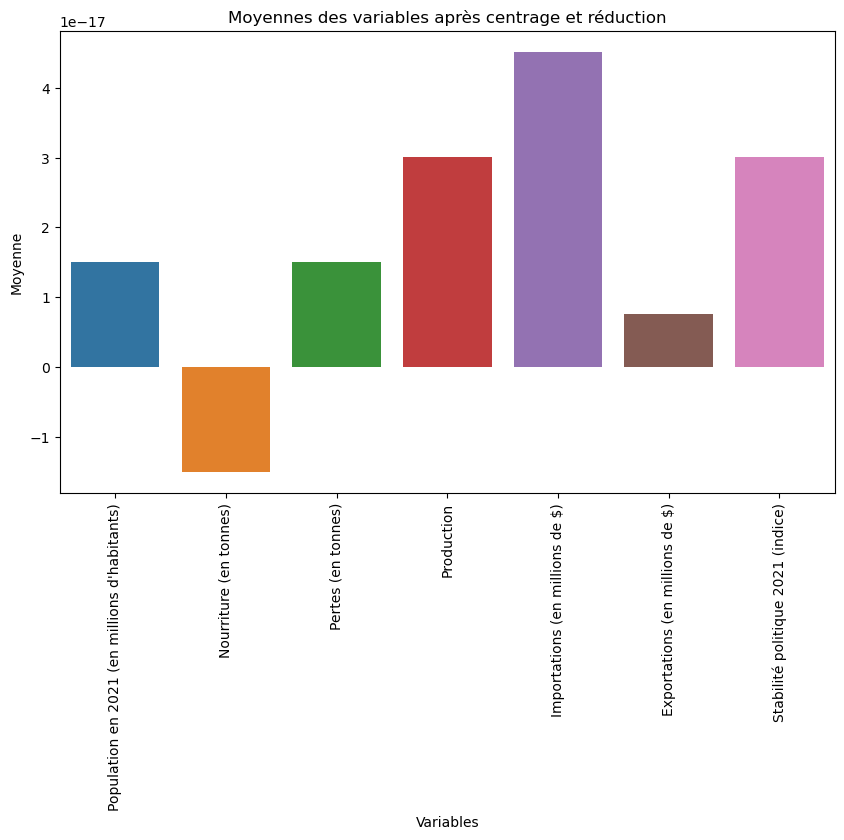

In [4]:
# Appliquer le StandardScaler aux données numériques (cibler float, int)
colonnes_numeriques = df_final.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
df_final[colonnes_numeriques] = scaler.fit_transform(df_final[colonnes_numeriques])

# Vérification des types de colonnes après ma transformation
print("\nTypes de colonnes après transformation :")
print(df_final.dtypes)

# Calculer les moyennes et les écarts-types des colonnes centrées et réduites
means = df_final[colonnes_numeriques].mean()
std_devs = df_final[colonnes_numeriques].std()

# Afficher les moyennes et les écarts-types
print("\nMoyennes des colonnes centrées et réduites :")
print(means)
print("\nÉcarts-types des colonnes centrées et réduites :")
print(std_devs)

# Vérifier que les moyennes sont proches de 0 et les écarts-types proches de 1
assert np.allclose(means, 0, atol=1e-8), "Certaines moyennes ne sont pas proches de 0"
assert np.allclose(std_devs, 1, atol=1e-2), "Certains écarts-types ne sont pas proches de 1"

print("\nLe centrage et la réduction ont été effectués correctement.")

# Créer un graphique en barres pour visualiser les moyennes
plt.figure(figsize=(10, 6))
sns.barplot(x=means.index, y=means.values)
plt.xticks(rotation=90)
plt.xlabel('Variables')
plt.ylabel('Moyenne')
plt.title('Moyennes des variables après centrage et réduction')
plt.show()


# 1 - Classification hiérarchique ascendante (CAH)

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Dendrogramme </span></li>
</ul>

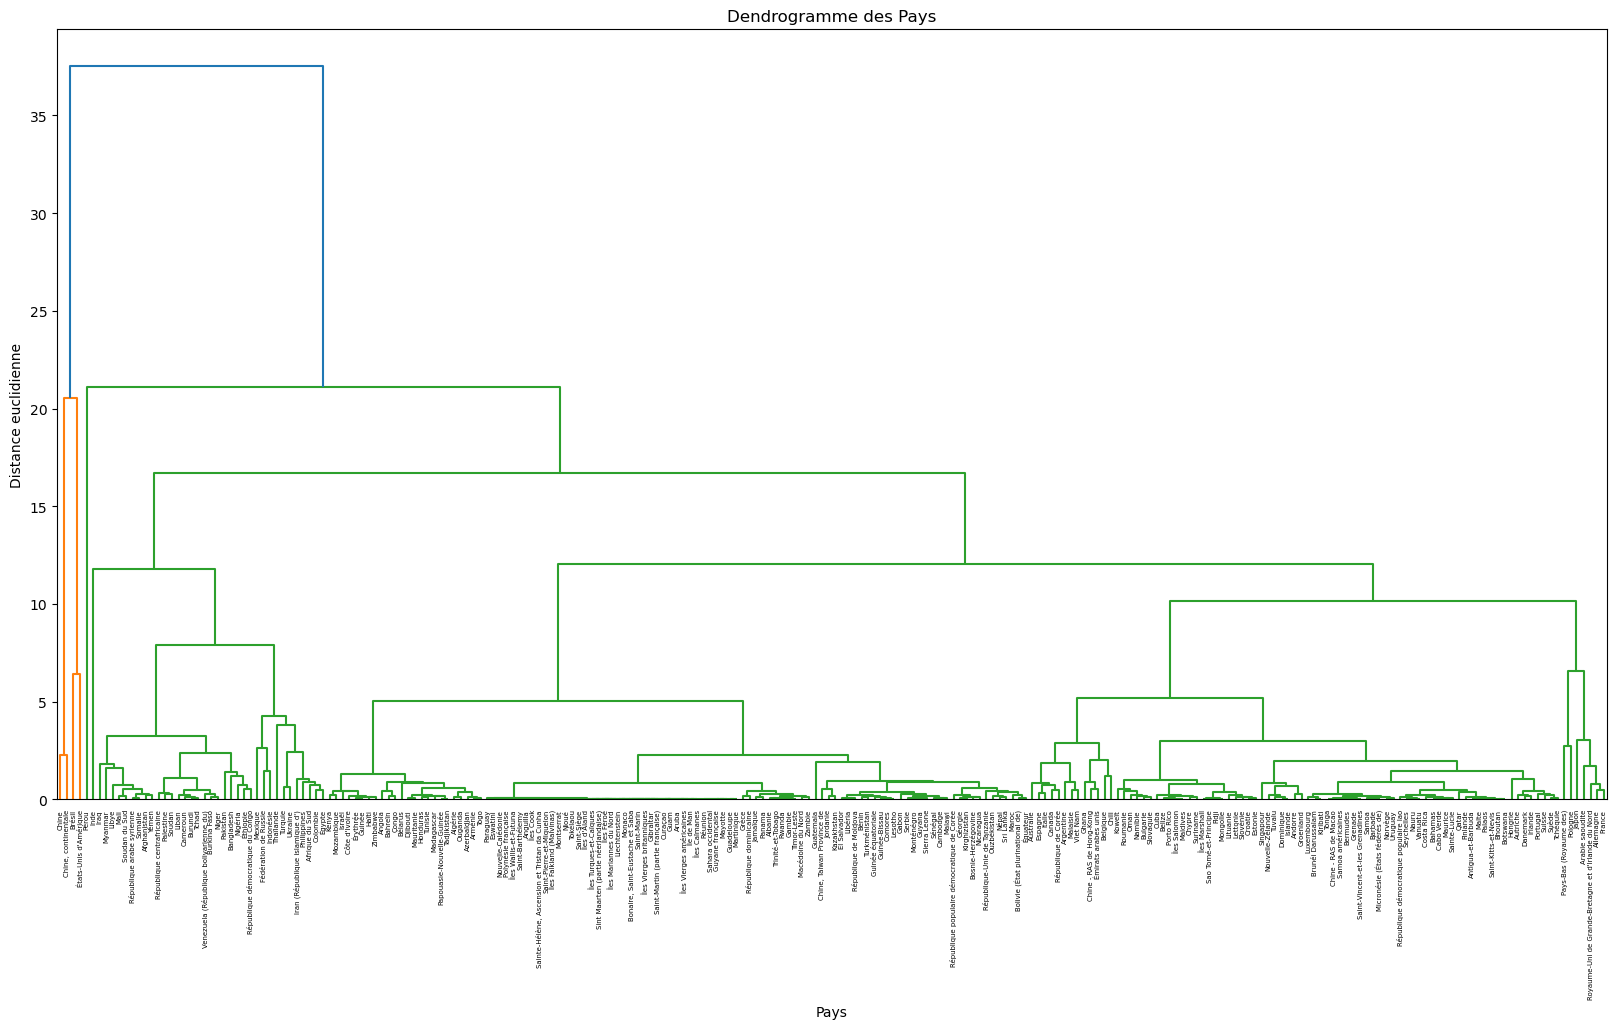

In [5]:
# Copier les données finales pour effectuer la CAH
X = pd.DataFrame(df_final)

# Retirer la colonne "Zone" pour effectuer la CAH
donnees_cah = X.drop(columns=["Zone"])

# Calcul des distances et regroupements hiérarchiques
Z = sch.linkage(donnees_cah, method="ward")

# Afficher le dendrogramme
plt.figure(figsize=(20, 10))
dendrogram = sch.dendrogram(Z, labels=df_final["Zone"].tolist(), leaf_rotation=90)
plt.title("Dendrogramme des Pays")
plt.xlabel("Pays")
plt.ylabel("Distance euclidienne")

# Enregistrer le dendrogramme sous format png
plt.savefig("dendrogramme.png", dpi=300)

plt.show()

<div style="border: 2px solid red; padding: 10px; font-family: 'Arial', sans-serif; font-size: 16px;">
    <h2 style="font-weight: normal;">Accès au dendrogramme des pays en .png avec zoom possible :</h2>
    <p style="font-weight: normal;">(cliquez sur l'image)</p>
    <a href="dendrogramme.png" target="_blank">
        <img src="dendrogramme 2.png" alt="Dendrogramme des Pays" width="800">
    </a>
</div>

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Interpretation du résultat </span></li>
</ul>

In [6]:
from sklearn.cluster import AgglomerativeClustering

# Définir le nombre optimal de clusters (choisi à partir des sauts euclidiens)
nombre_clusters = 6

# Appliquer la CAH avec le nombre de clusters 
clustering = AgglomerativeClustering(n_clusters=nombre_clusters, linkage='ward')
df_final['Cluster'] = clustering.fit_predict(donnees_cah)

# Calculer les moyennes des variables par cluster
moyennes_par_cluster = df_final.groupby('Cluster')[colonnes_numeriques].mean()

# Afficher les moyennes par cluster
print("\nMoyennes des variables par cluster :")
display(moyennes_par_cluster)


Moyennes des variables par cluster :


,Population en 2021 (en millions d'habitants),Nourriture (en tonnes),Pertes (en tonnes),Production,Importations (en millions de $),Exportations (en millions de $),Stabilité politique 2021 (indice)
Cluster,,,,,,,
0,0.409829,0.206556,0.006505,0.177056,-0.043532,-0.054674,-1.674057
1,-0.165113,-0.129801,-0.059069,-0.126185,0.092611,0.013790,0.945206
2,-0.188494,-0.229241,-0.088715,-0.227639,-0.235614,-0.182464,-0.208012
3,8.551569,7.709904,-0.103185,6.554428,9.167694,0.774166,0.068225
4,1.439124,6.333320,-0.103185,7.724247,0.142634,9.460417,-0.202892
5,-0.036399,0.428771,14.869059,0.530260,0.007454,-0.190734,-0.385482


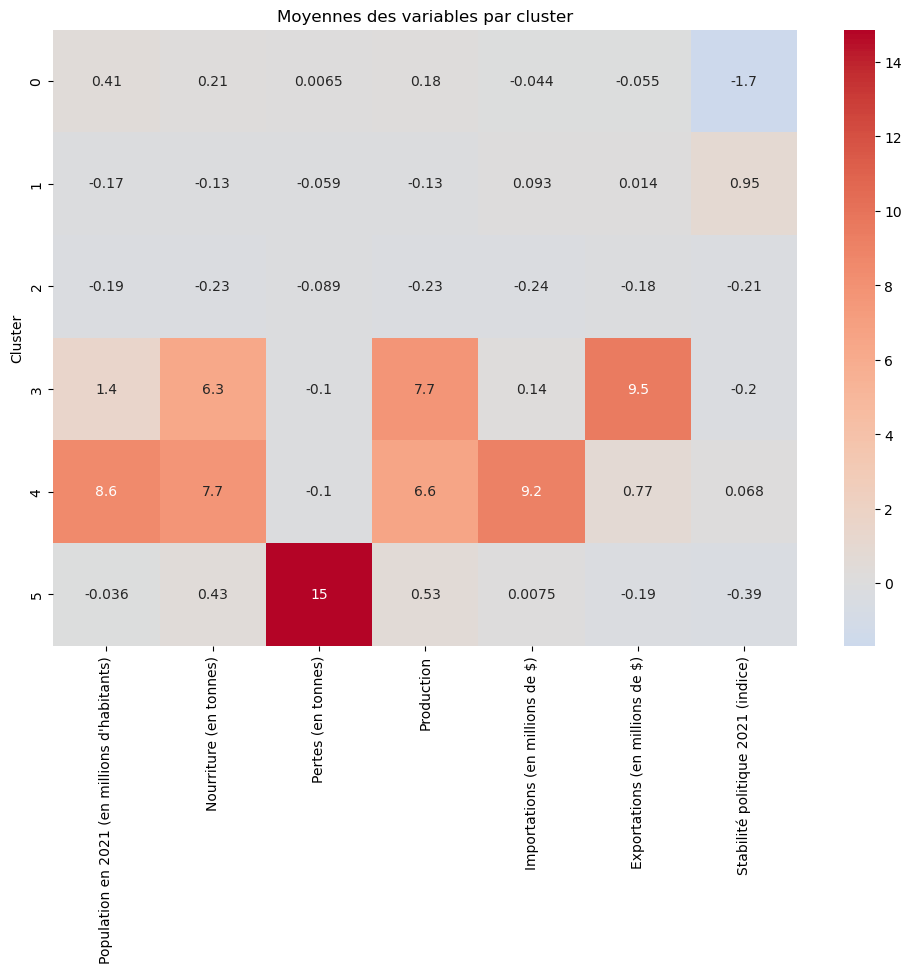

In [7]:
# Colonne numérique
numeric_columns = df_final.select_dtypes(include=["number"])

# Cluster
nombre_clusters = 6
clustering = AgglomerativeClustering(n_clusters=nombre_clusters, linkage='ward')
df_final['Cluster'] = clustering.fit_predict(numeric_columns)

# Filtre
numeric_columns["Cluster"] = df_final["Cluster"]  
moyennes_par_cluster = numeric_columns.groupby("Cluster").mean()

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(moyennes_par_cluster, annot=True, cmap='coolwarm', center=0)
plt.title('Moyennes des variables par cluster')
plt.show()


In [8]:
# Grouper par Cluster et compter le nombre de pays
nombre_pays_par_cluster = df_final.groupby("Cluster").size().reset_index(name="Nombre de pays")

# Obtenir les noms des pays par cluster
pays_par_cluster = df_final.groupby("Cluster")["Zone"].apply(list).reset_index(name="Liste des pays")

# Afficher les résultats
print("Nombre de pays par cluster:")
print(nombre_pays_par_cluster)

print("\nNoms des pays par cluster:")
print(pays_par_cluster)



Nombre de pays par cluster:
   Cluster  Nombre de pays
0        0              36
1        1              88
2        2             107
3        3               2
4        4               2
5        5               1

Noms des pays par cluster:
   Cluster                                     Liste des pays
0        0  [Afghanistan, Afrique du Sud, Bangladesh, Burk...
1        1  [Allemagne, Andorre, Antigua-et-Barbuda, Arabi...
2        2  [Albanie, Algérie, Angola, Anguilla, Arménie, ...
3        3                    [Brésil, États-Unis d'Amérique]
4        4                       [Chine, Chine, continentale]
5        5                                            [Pérou]


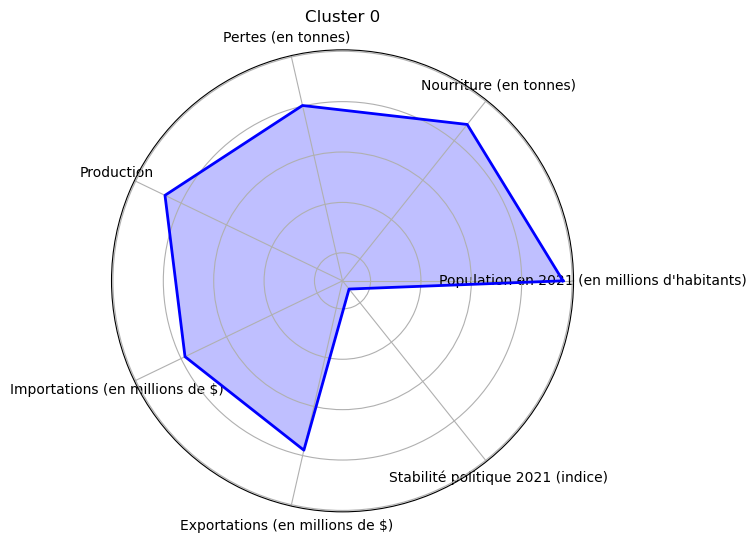

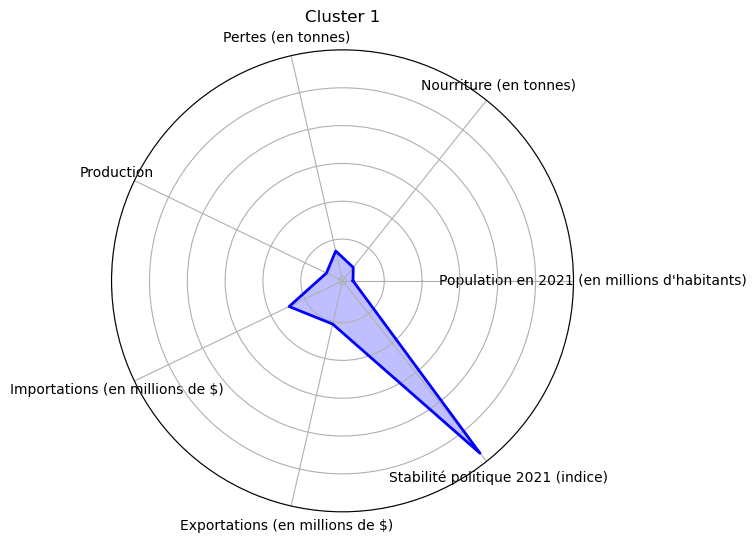

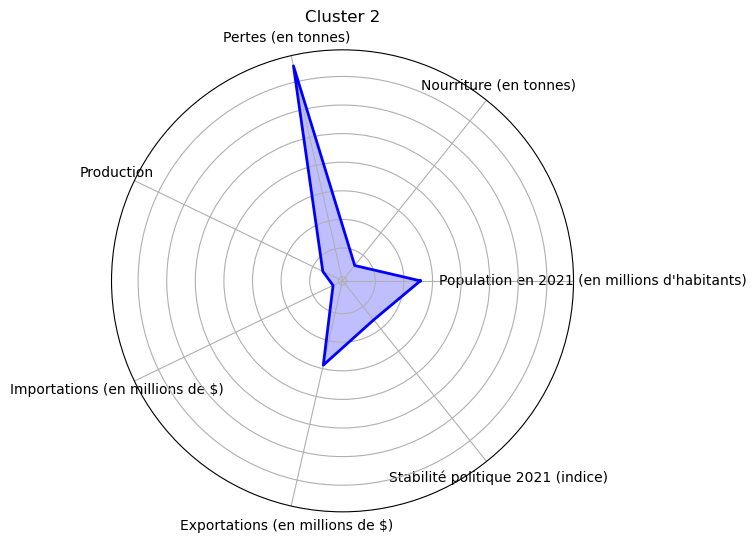

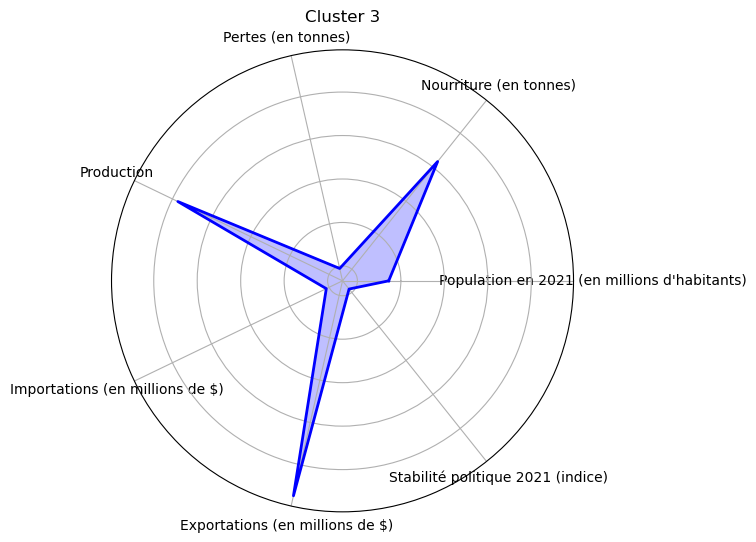

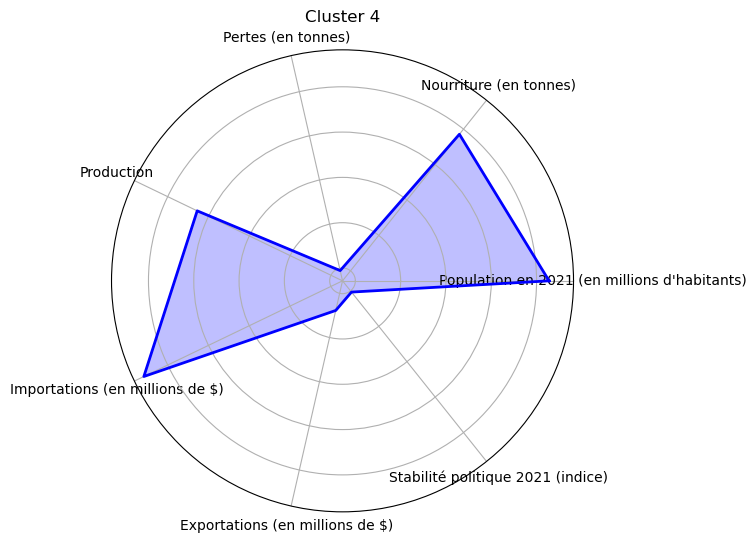

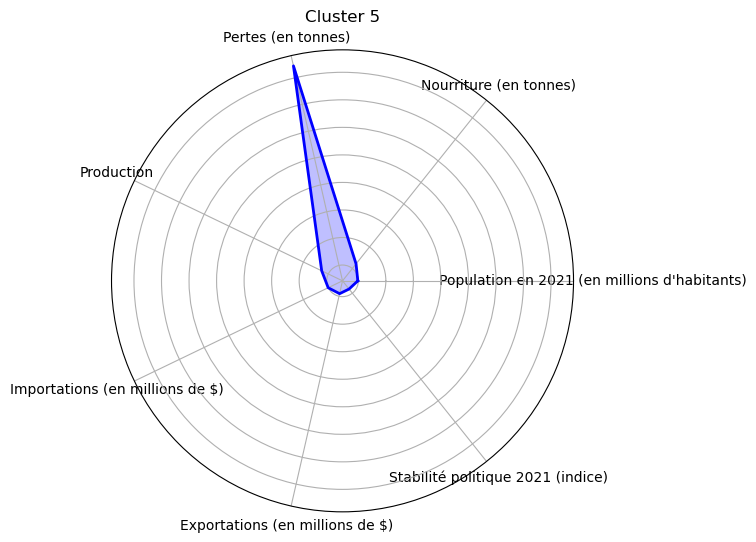

In [9]:
# Sélectionner uniquement les colonnes numériques pour le clustering
numeric_columns = df_final.select_dtypes(include=["number"])

# Clustering
nombre_clusters = 6
clustering = AgglomerativeClustering(n_clusters=nombre_clusters, linkage="ward")
df_final["Cluster"] = clustering.fit_predict(numeric_columns)

# Filtrer les colonnes non numériques avant de calculer les moyennes
numeric_columns["Cluster"] = df_final["Cluster"]
moyennes_par_cluster = numeric_columns.groupby("Cluster").mean()

# Fonction pour créer un radar chart
def create_radar_chart(data, cluster_num):
    labels = data.index
    num_vars = len(labels)
    
    
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
   
    angles += angles[:1]
    data = data.tolist()
    data += data[:1]
    
    # Radar chart 
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.fill(angles, data, color='b', alpha=0.25)
    ax.plot(angles, data, color='b', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_title(f'Cluster {cluster_num}')
    plt.show()

# Créer un radar chart pour chaque cluster
for cluster_num in range(nombre_clusters):
    create_radar_chart(moyennes_par_cluster.loc[cluster_num], cluster_num)


# 2 - K-means 

In [10]:
import warnings # pour éviter les avertissements liés à windows sur mon pc
import os

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Evaluation du nombre k </span></li>
</ul>

In [11]:
# Importation du dataframe
df_final = pd.read_csv("df_final.csv", sep=';')

# Faire une copie du dataframe
df_final_B = df_final.copy()
display(df_final_B)

,Zone,Population en 2021 (en millions d'habitants),Calories/Année,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (g/personne/jour),Nourriture (en tonnes),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Pertes (en tonnes),Matière Grasse/Année,...,Importations - Quantité (tonnes),Importations (en millions de $),Exportations - Quantité (tonnes),Exportations (en millions de $),PIB 2021 (en millions USD),% inflation (Décembre 2021),Nombre de personnes sous-alimentées en 2021 (en millions),Stabilité politique 2021 (indice),Total emission CH4 (kilotonnes) imputable à l'élevage de poulet en 2021,Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021
0,Afghanistan,40099462.0,83541.27,5.71,4.14,60642.62,0.33,0.68,0.0,4839.28,...,32613.38,4.613900e+07,13.81,31000.0,1.493901e+04,17.739358,12.0,-2.53,0.0331,0.0399
1,Afrique du Sud,59392255.0,3581760.00,165.22,119.94,2600000.00,9.57,19.75,0.0,207480.00,...,345579.16,2.763800e+08,43653.91,66752000.0,4.190156e+05,5.374054,4.7,-0.71,2.6601,1.7597
2,Albanie,2854710.0,77898.56,74.76,54.27,56546.58,4.33,8.93,0.0,4512.42,...,0.00,0.000000e+00,0.00,0.0,1.826004e+04,6.400000,0.1,0.11,0.0563,0.0310
3,Algérie,44177969.0,354903.27,22.01,15.98,257624.33,1.27,2.63,0.0,20558.42,...,0.40,1.000000e+03,1616.35,1538000.0,1.634728e+05,12.496520,0.0,-0.88,2.2713,1.5025
4,Allemagne,83408554.0,1310718.22,43.05,31.25,951450.51,2.49,5.15,0.0,75925.75,...,475448.52,1.224784e+09,265822.29,588584000.0,4.259935e+06,5.965633,0.0,0.76,2.3391,1.2890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,Viet Nam,97468029.0,2379315.65,66.88,48.55,1727145.50,3.87,7.99,0.0,137826.21,...,206448.19,2.203040e+08,14167.97,17937000.0,3.661376e+05,0.505229,4.9,-0.11,8.9943,5.4288
232,Yémen,32981641.0,486212.00,40.39,29.32,352941.35,2.34,4.83,0.0,28164.72,...,0.00,0.000000e+00,0.00,0.0,9.946815e+03,2.262811,11.4,-2.59,1.2199,0.7897
233,Zambie,19473125.0,85737.41,12.06,8.76,62236.80,0.70,1.44,0.0,4966.50,...,19511.18,2.309000e+07,8974.49,13786000.0,2.131337e+04,19.898683,5.8,0.06,0.6001,0.3970
234,Zimbabwe,15993524.0,161277.51,27.63,20.05,117071.36,1.60,3.30,0.0,9342.29,...,0.00,0.000000e+00,0.00,0.0,2.411815e+04,64.908403,6.1,-1.03,0.2477,0.1639


In [12]:
# Liste des colonnes à supprimer
colonnes_a_supprimer = [
    "Importations - Quantité (tonnes)", 
    "Exportations - Quantité (tonnes)", 
    "Disponibilité de matière grasse en quantité (g/personne/jour)", 
    "Disponibilité alimentaire (Kcal/personne/jour)",
    "Disponibilité de protéines en quantité (g/personne/jour)",
    "Disponibilité alimentaire en quantité (g/personne/jour)", 
    "PIB 2021 (en millions USD)",
    "Matière Grasse/Année",
    "% inflation (Décembre 2021)",
    "Nombre de personnes sous-alimentées en 2021 (en millions)",
    "Total emission CH4 (kilotonnes) imputable à l'élevage de poulet en 2021",
    "Total emission N2O (kilotonnes) imputable à l'élevage de poulet en 2021",
    "Calories/Année"]

# Suppression des colonnes non nécessaires
df_final_B.drop(columns=colonnes_a_supprimer, inplace=True)

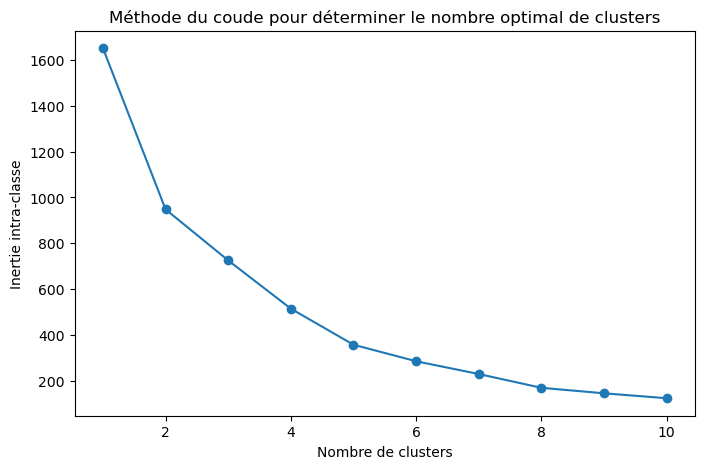

In [13]:
# Masquer les avertissements spécifiques de sklearn concernant les fuites de mémoire sur mon pc Windows avec MKL
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows with MKL")

# Définir la variable d'environnement OMP_NUM_THREADS pour éviter les fuites de mémoire
os.environ["OMP_NUM_THREADS"] = "1"
#_____________________________________________________________________________________________________________________

# Sélectionner uniquement les colonnes numériques pour la normalisation
numeric_columns = df_final_B.select_dtypes(include=["number"])

# Normalisation des données
scaler = StandardScaler()
df_final_B_scaled = scaler.fit_transform(numeric_columns)

# Déterminer le nombre optimal de clusters avec la méthode du coude
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)  # Ajout de n_init=10 pour éviter l'avertissement
    kmeans.fit(df_final_B_scaled)
    sse.append(kmeans.inertia_)

# Visualisation du coude
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie intra-classe')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.show()

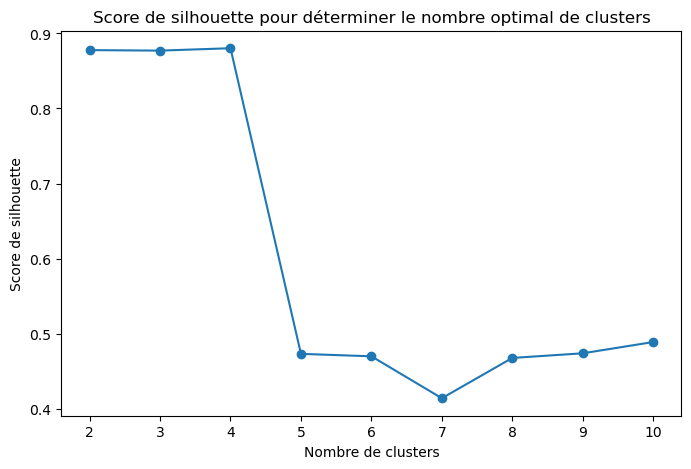

In [14]:
# Score silhouette

silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_final_B_scaled)
    score = silhouette_score(df_final_B_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('Score de silhouette pour déterminer le nombre optimal de clusters')
plt.show()


In [15]:
# Appliquer K-means avec le nombre optimal de clusters
nombre_clusters_optimal = 2
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B['Cluster'] = kmeans.fit_predict(df_final_B_scaled)

# Afficher les résultats
print("Nombre de pays par cluster:")
nombre_pays_par_cluster = df_final_B.groupby("Cluster").size().reset_index(name="Nombre de pays")
print(nombre_pays_par_cluster)

print("\nNoms des pays par cluster:")
pays_par_cluster = df_final_B.groupby("Cluster")["Zone"].apply(list).reset_index(name="Liste des pays")
print(pays_par_cluster)

Nombre de pays par cluster:
   Cluster  Nombre de pays
0        0             232
1        1               4

Noms des pays par cluster:
   Cluster                                     Liste des pays
0        0  [Afghanistan, Afrique du Sud, Albanie, Algérie...
1        1  [Brésil, Chine, Chine, continentale, États-Uni...


In [16]:
# Appliquer K-means avec un autre nombre de clusters
nombre_clusters_optimal = 4
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B['Cluster'] = kmeans.fit_predict(df_final_B_scaled)

# Afficher les résultats
print("Nombre de pays par cluster:")
nombre_pays_par_cluster = df_final_B.groupby("Cluster").size().reset_index(name="Nombre de pays")
print(nombre_pays_par_cluster)

print("\nNoms des pays par cluster:")
pays_par_cluster = df_final_B.groupby("Cluster")["Zone"].apply(list).reset_index(name="Liste des pays")
print(pays_par_cluster)

Nombre de pays par cluster:
   Cluster  Nombre de pays
0        0             231
1        1               2
2        2               2
3        3               1

Noms des pays par cluster:
   Cluster                                     Liste des pays
0        0  [Afghanistan, Afrique du Sud, Albanie, Algérie...
1        1                    [Brésil, États-Unis d'Amérique]
2        2                       [Chine, Chine, continentale]
3        3                                            [Pérou]


In [17]:
# Appliquer K-means avec un autre nombre de clusters
nombre_clusters_optimal = 5
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B["Cluster"] = kmeans.fit_predict(df_final_B_scaled)

# Calculer le nombre de pays par cluster
nombre_pays_par_cluster = df_final_B.groupby("Cluster").size().reset_index(name="Nombre de pays")

# Regrouper par cluster et concaténer les noms de pays en une seule chaîne séparée par des virgules
pays_par_cluster = df_final_B.groupby("Cluster")["Zone"].apply(lambda x: sorted(set(x))).reset_index(name="Liste des pays")

# Afficher les résultats avec une présentation propre
print("\033[1mNombre de pays par cluster:\033[0m")
for index, row in nombre_pays_par_cluster.iterrows():
    print(f"\033[1mCluster {row['Cluster']}:\033[0m {row['Nombre de pays']} pays")

print("\n\033[1mNoms des pays par cluster:\033[0m")
for index, row in pays_par_cluster.iterrows():
    pays_str = ", ".join(row['Liste des pays'])
    print(f"\033[1mCluster {row['Cluster']}:\033[0m {pays_str}")


Nombre de pays par cluster:
Cluster 0: 60 pays
Cluster 1: 2 pays
Cluster 2: 2 pays
Cluster 3: 171 pays
Cluster 4: 1 pays

Noms des pays par cluster:
Cluster 0: Afghanistan, Afrique du Sud, Algérie, Angola, Arabie saoudite, Arménie, Azerbaïdjan, Bangladesh, Burkina Faso, Burundi, Bélarus, Cameroun, Colombie, Congo, Côte d'Ivoire, Djibouti, Fédération de Russie, Guinée, Haïti, Honduras, Inde, Indonésie, Iran (République islamique d'), Iraq, Israël, Kenya, Liban, Libye, Madagascar, Mali, Mauritanie, Mexique, Mozambique, Myanmar, Niger, Nigéria, Ouganda, Pakistan, Palestine, Papouasie-Nouvelle-Guinée, Philippines, République arabe syrienne, République centrafricaine, République démocratique du Congo, Somalie, Soudan, Soudan du Sud, Tadjikistan, Tchad, Thaïlande, Togo, Tunisie, Turquie, Ukraine, Venezuela (République bolivarienne du), Yémen, Zimbabwe, Égypte, Érythrée, Éthiopie
Cluster 1: Chine, Chine, continentale
Cluster 2: Brésil, États-Unis d'Amérique
Cluster 3: Albanie, Allemagne, Ando

In [18]:
# Appliquer K-means avec un autre nombre de clusters
nombre_clusters_optimal = 6
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B['Cluster'] = kmeans.fit_predict(df_final_B_scaled)

# Afficher les résultats
print("Nombre de pays par cluster:")
nombre_pays_par_cluster = df_final_B.groupby("Cluster").size().reset_index(name="Nombre de pays")
print(nombre_pays_par_cluster)

print("\nNoms des pays par cluster:")
pays_par_cluster = df_final_B.groupby("Cluster")["Zone"].apply(list).reset_index(name="Liste des pays")
print(pays_par_cluster)

Nombre de pays par cluster:
   Cluster  Nombre de pays
0        0             171
1        1               2
2        2               1
3        3               2
4        4               1
5        5              59

Noms des pays par cluster:
   Cluster                                     Liste des pays
0        0  [Albanie, Allemagne, Andorre, Anguilla, Antigu...
1        1                       [Chine, Chine, continentale]
2        2                                            [Pérou]
3        3                    [Brésil, États-Unis d'Amérique]
4        4                                             [Inde]
5        5  [Afghanistan, Afrique du Sud, Algérie, Angola,...


In [19]:
# Appliquer K-means avec un autre nombre de clusters
nombre_clusters_optimal = 7
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B["Cluster"] = kmeans.fit_predict(df_final_B_scaled)

# Calculer le nombre de pays par cluster
nombre_pays_par_cluster = df_final_B.groupby("Cluster").size().reset_index(name="Nombre de pays")

# Regrouper par cluster et concaténer les noms de pays en une seule chaîne séparée par des virgules
pays_par_cluster = df_final_B.groupby("Cluster")["Zone"].apply(lambda x: sorted(set(x))).reset_index(name="Liste des pays")

# Afficher les résultats avec une présentation propre
print("\033[1mNombre de pays par cluster:\033[0m")
for index, row in nombre_pays_par_cluster.iterrows():
    print(f"\033[1mCluster {row['Cluster']}:\033[0m {row['Nombre de pays']} pays")

print("\n\033[1mNoms des pays par cluster:\033[0m")
for index, row in pays_par_cluster.iterrows():
    pays_str = ", ".join(row['Liste des pays'])
    print(f"\033[1mCluster {row['Cluster']}:\033[0m {pays_str}")


Nombre de pays par cluster:
Cluster 0: 45 pays
Cluster 1: 2 pays
Cluster 2: 2 pays
Cluster 3: 81 pays
Cluster 4: 104 pays
Cluster 5: 1 pays
Cluster 6: 1 pays

Noms des pays par cluster:
Cluster 0: Afghanistan, Afrique du Sud, Algérie, Arabie saoudite, Bangladesh, Burkina Faso, Burundi, Cameroun, Colombie, Côte d'Ivoire, Fédération de Russie, Guinée, Haïti, Indonésie, Iran (République islamique d'), Iraq, Israël, Kenya, Liban, Libye, Mali, Mexique, Mozambique, Myanmar, Niger, Nigéria, Pakistan, Palestine, Philippines, République arabe syrienne, République centrafricaine, République démocratique du Congo, Somalie, Soudan, Soudan du Sud, Tchad, Thaïlande, Turquie, Ukraine, Venezuela (République bolivarienne du), Yémen, Zimbabwe, Égypte, Érythrée, Éthiopie
Cluster 1: Brésil, États-Unis d'Amérique
Cluster 2: Chine, Chine, continentale
Cluster 3: Allemagne, Andorre, Antigua-et-Barbuda, Australie, Autriche, Bahamas, Barbade, Belgique, Belize, Bermudes, Bhoutan, Botswana, Brunéi Darussalam, Bu

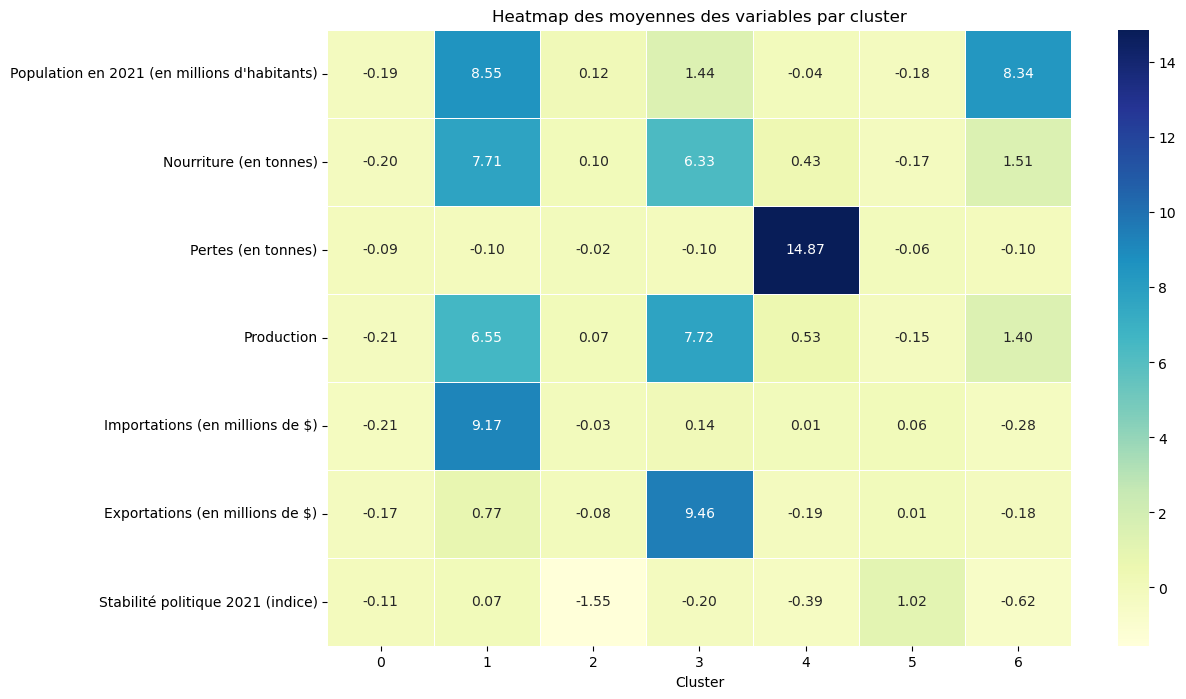

In [20]:
# Sélectionner uniquement les colonnes numériques pour la normalisation
numeric_columns = df_final_B.select_dtypes(include=np.number)

# Normalisation des données
scaler = StandardScaler()
df_final_B_scaled = scaler.fit_transform(numeric_columns)

# Appliquer K-means avec le nombre de clusters
nombre_clusters_optimal = 7
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B["Cluster"] = kmeans.fit_predict(df_final_B_scaled)

# Calculer les moyennes des variables par cluster
numeric_columns_names = numeric_columns.columns
cluster_means = pd.DataFrame(df_final_B_scaled, columns=numeric_columns_names)
cluster_means['Cluster'] = df_final_B['Cluster']
cluster_means = cluster_means.groupby('Cluster').mean()

# Créer la heatmap des moyennes des variables par cluster
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.T, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=.5)
plt.title('Heatmap des moyennes des variables par cluster')
plt.show()


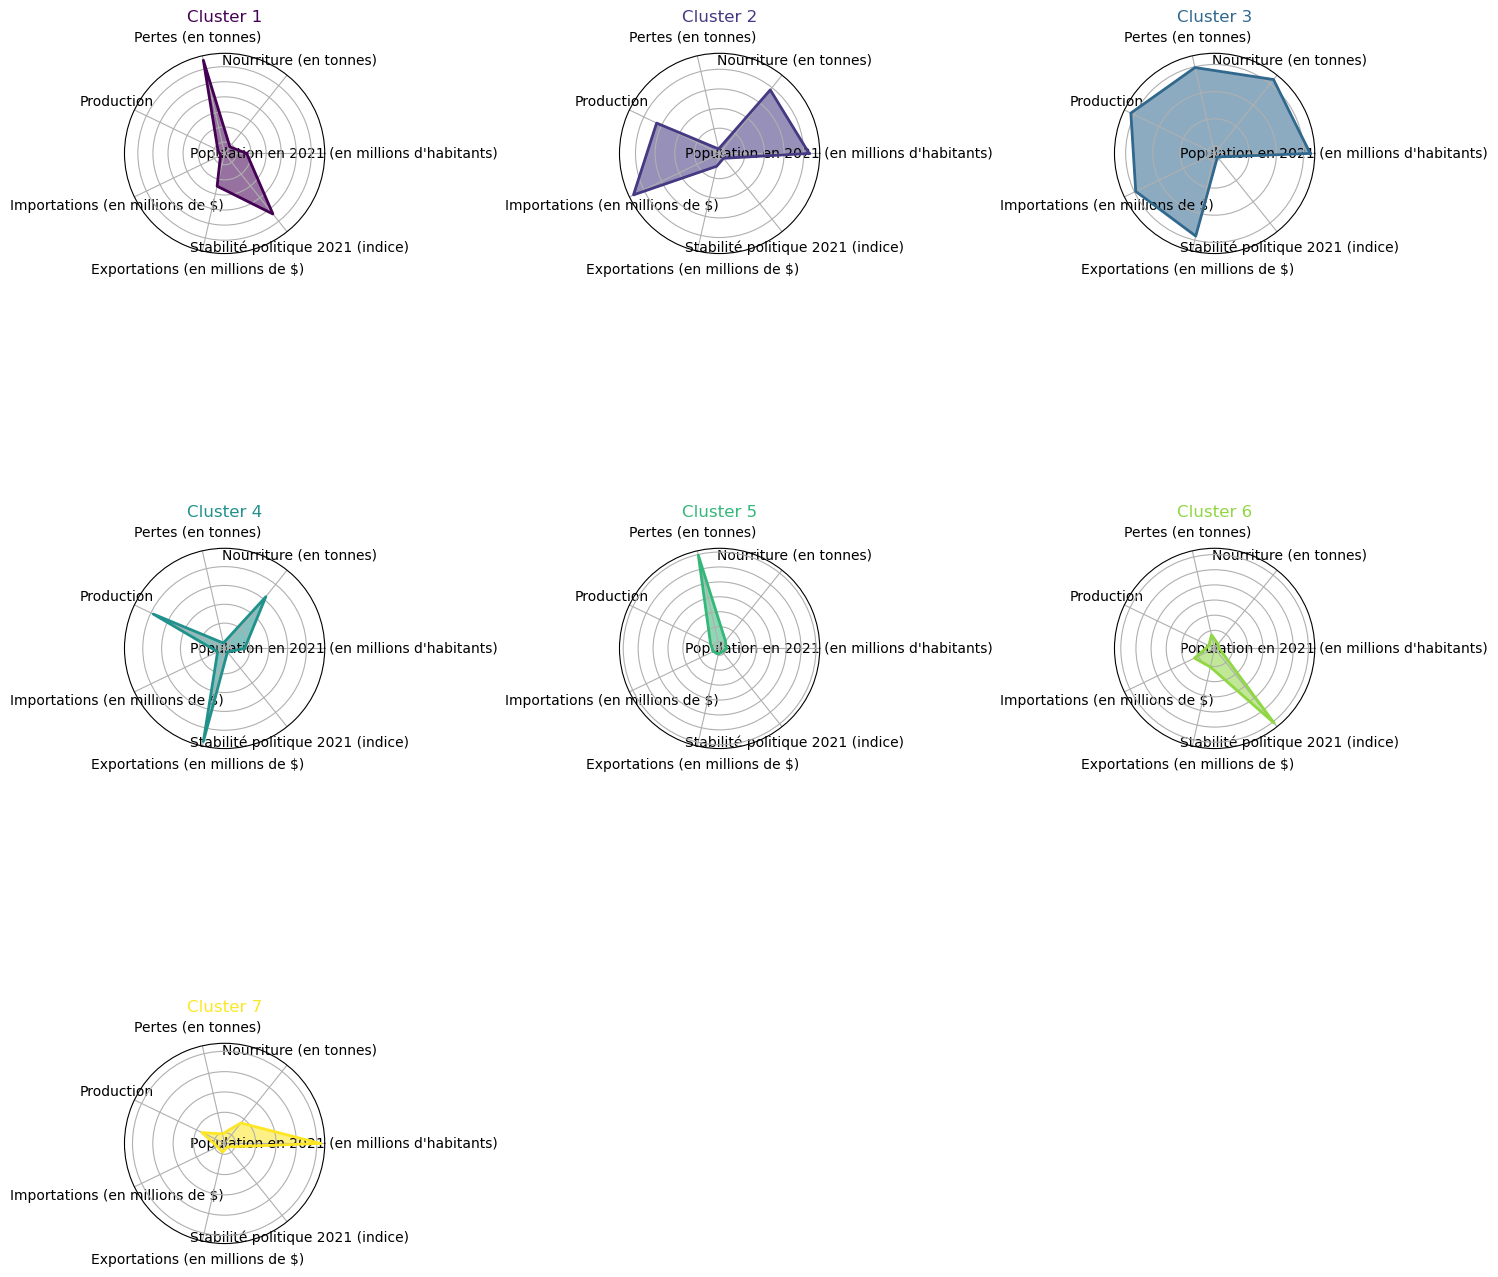

In [21]:
# Nombre de clusters
num_clusters = len(cluster_means)

# Noms des variables (axes du radar)
variables = list(cluster_means.columns)
num_vars = len(variables)

# Créer un subplot pour chaque cluster (7 clusters nécessitent une grille 3x3, où le dernier subplot sera vide)
fig, axs = plt.subplots(nrows=3, ncols=3, subplot_kw=dict(polar=True), figsize=(15, 15))

# Ajuster les espacements entre les sous-graphiques
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Couleurs pour chaque cluster
colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

# Plotting
for i, ax in enumerate(axs.flat):
    if i < num_clusters:
        # Valeurs des moyennes pour le cluster i
        values = cluster_means.iloc[i].values.flatten().tolist()

        # Angle pour chaque variable
        angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

        # Fermer le plot
        values += values[:1]
        angles += angles[:1]

        # Dessiner le radar
        ax.fill(angles, values, color=colors[i], alpha=0.5)
        ax.plot(angles, values, color=colors[i], linewidth=2)
        ax.fill(angles, values, color=colors[i], alpha=0.1)

        # Étiquettes des axes
        ax.set_yticklabels([])
        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(variables, fontsize=10)

        # Titre du cluster
        ax.set_title(f'Cluster {i+1}', fontsize=12, color=colors[i])
    else:
        ax.axis('off')  # Désactiver l'affichage pour les subplots vides

plt.tight_layout()
plt.show()

<ul>
  <li><span style="color: green; font-weight: bold; font-style: italic; font-size: 1.5em;">Etude des centroides et représentation en 2 dimensions (t-SNE) </span></li>
</ul>

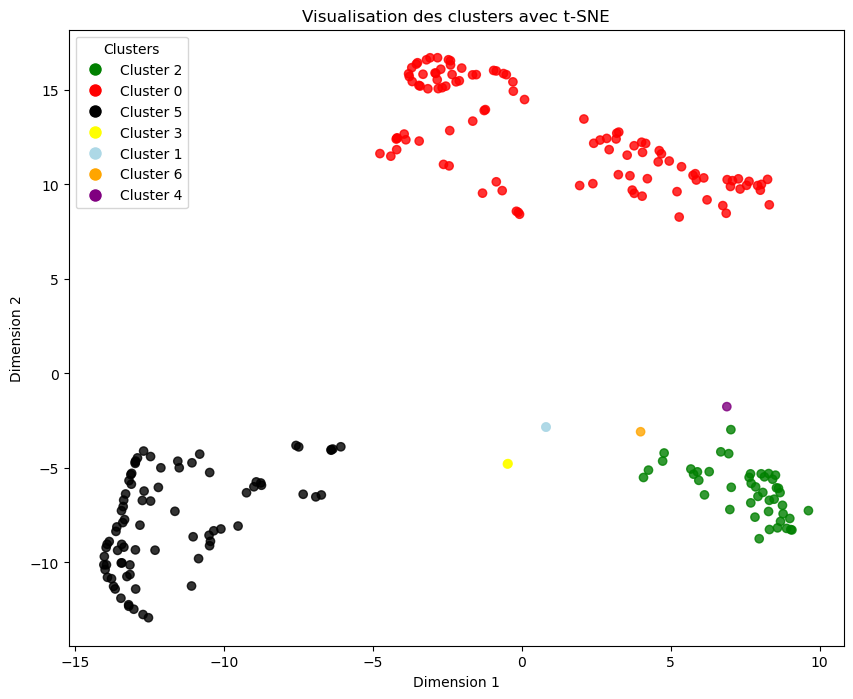

In [25]:
# Palette de couleurs personnalisée
color_palette = {
    0: 'red',
    1: 'lightblue',
    2: 'green',
    3: 'yellow',
    4: 'purple',
    5: 'black',
    6: 'orange'
}

# 1. Réduction de dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_final_B_scaled)

# 2. Créer un DataFrame pour les résultats de t-SNE
df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = df_final_B['Cluster']

# 3. Visualisation des clusters en 2D
plt.figure(figsize=(10, 8))

# Créer un scatter plot avec une couleur par cluster
colors = df_tsne['Cluster'].map(color_palette)
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=colors, alpha=0.8)

# Ajouter une légende personnalisée avec une couleur par cluster
legend_labels = df_tsne['Cluster'].unique()
legend_handles = []
for cluster in legend_labels:
    color = color_palette[cluster]
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', markerfacecolor=color, markersize=10))

# Afficher la légende
plt.legend(handles=legend_handles, title="Clusters", loc='upper left')

plt.title('Visualisation des clusters avec t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

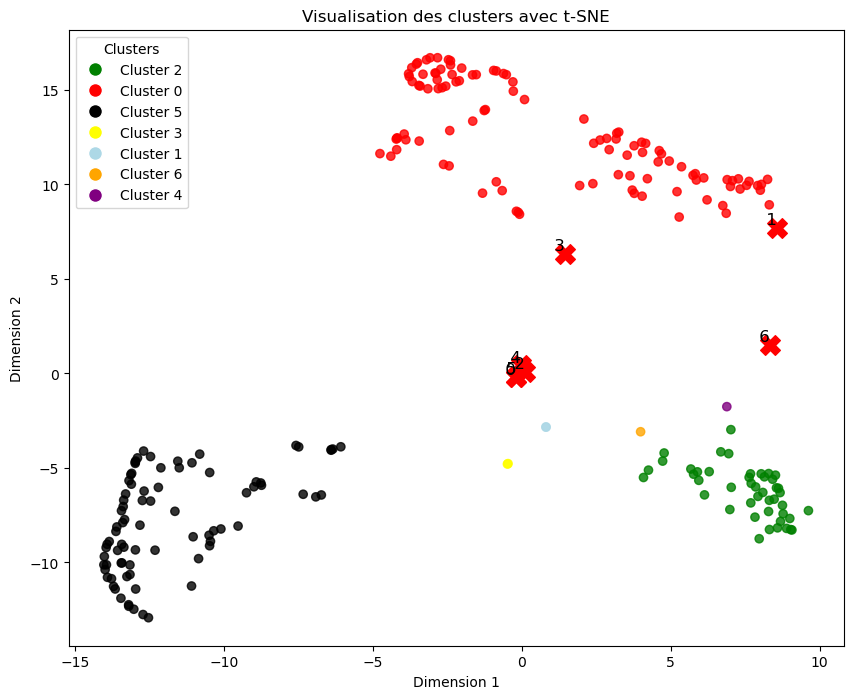

In [27]:
# Appliquer K-means avec le nombre optimal de clusters
nombre_clusters_optimal = 7
kmeans = KMeans(n_clusters=nombre_clusters_optimal, random_state=42, n_init=10)
df_final_B["Cluster"] = kmeans.fit_predict(df_final_B_scaled)

# Réduction de dimensions avec t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(df_final_B_scaled)

# Créer un DataFrame pour les résultats de t-SNE
df_tsne = pd.DataFrame(tsne_result, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = df_final_B['Cluster']

# Définir les couleurs pour chaque cluster
colors = ['red', 'lightblue', 'green', 'yellow', 'purple', 'black', 'orange']

# Visualisation des clusters en 2D
plt.figure(figsize=(10, 8))

# Créer un scatter plot avec une couleur par cluster
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Cluster'].map(lambda x: colors[x]), alpha=0.8)

# Ajouter les centroids avec annotation (# Annotation du centroid avec son numéro de cluster)
centroids = kmeans.cluster_centers_
for i, centroid in enumerate(centroids):
    plt.scatter(centroid[0], centroid[1], marker='X', s=200, c='red')
    plt.text(centroid[0], centroid[1], f' {i}', fontsize=12, ha='right', va='bottom') 

# Ajouter une légende personnalisée avec une couleur par cluster
legend_labels = df_tsne['Cluster'].unique()
legend_handles = []
for cluster in legend_labels:
    legend_handles.append(plt.Line2D([0], [0], marker='o', color='w', label=f'Cluster {cluster}', 
                                     markerfacecolor=colors[cluster], markersize=10))

# Afficher la légende
plt.legend(handles=legend_handles, title="Clusters", loc='upper left')

plt.title('Visualisation des clusters avec t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
